# Titanic dataset

Load the titanic dataset using seaborn. pip install seaborn, 'import seaborn as sns', then load using 'sns.load_dataset('titanic')'


In [72]:
#initialisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
titanic_df = sns.load_dataset("titanic")
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Clean the dataset: 

- Where are the missing values, can they be filled/need to be dropped?
    - df.isnull()
    - df.fillna()
    - df.dropna() 
- Are there any duplicates?
    - df.duplicated()
    - df.drop_duplicates()
- Do any columns need renaming?
    - df.rename() 
- Any other data quality concepts you can check?

In [74]:
#python
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

We notice that there are 688 nulls for deck, which is a very significant amount. So we drop the deck column.

In [75]:
titanic_df = titanic_df.drop(columns=["deck"])
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

We can drop the rows where embarked and embark_town is null

In [76]:
titanic_df = titanic_df.dropna(subset=['embarked','embark_town'])
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

Finally, we see there is a singificant number of nulls for age. We can either fill these with the median value, or drop these rows. Why not both!

In [77]:
titanic_fill_age_df = titanic_df.copy()
titanic_no_fill_age_df = titanic_df.copy()

titanic_fill_age_df['age'] = titanic_fill_age_df['age'].fillna(value=titanic_df['age'].median())
titanic_no_fill_age_df = titanic_no_fill_age_df.dropna()

In [78]:
duplicated = titanic_fill_age_df.duplicated().sum()
duplicated2 = titanic_no_fill_age_df.duplicated().sum()
print(f"There are {duplicated} duplicate rows in the dataframe")
print(f"There are {duplicated2} duplicate rows in the dataframe")

There are 116 duplicate rows in the dataframe
There are 38 duplicate rows in the dataframe


Now we drop the duplicate rows

In [90]:
titanic_fill_age_df = titanic_fill_age_df.drop_duplicates()
titanic_no_fill_age_df = titanic_no_fill_age_df.drop_duplicates()

In [ ]:
print(f"The data frame with filled ages has {titanic_fill_age_df.shape[0]} entries, {titanic_fill_age_df.duplicated().sum()} duplicates, and {titanic_fill_age_df.isna().sum().sum()} null values")
print(f"The data frame with filled ages has {titanic_no_fill_age_df.shape[0]} entries, {titanic_no_fill_age_df.duplicated().sum()} duplicates, and {titanic_no_fill_age_df.isna().sum().sum()} null values")

Let's rename some columns


In [96]:
print(list(titanic_no_fill_age_df.columns))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'percentage_fare_of_total']


In [100]:
rename_columns = {'sibsp':'siblings_and_spouses',
                  'parch':'parents_and_children',
                  'embarked':'embark_port'}
titanic_no_fill_age_df = titanic_no_fill_age_df.rename(columns=rename_columns)
print(list(titanic_no_fill_age_df.columns))

['survived', 'pclass', 'sex', 'age', 'siblings_and_spouses', 'parents_and_children', 'fare', 'embark_port', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'percentage_fare_of_total']


## Check the descriptive statistics
- df.describe()

In [81]:
titanic_fill_age_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Find the average fare and age for each class 
- df.groupby()
- mean()

In [82]:
titanic_no_fill_age_df[['class','age','fare']].groupby(['class'],observed=True).mean()


,age,fare
class,,
First,38.051758,88.489035
Second,29.859684,22.168223
Third,25.180150,13.377507


Here we see the average (mean) age and fare for each class.

## Add a new column showing the fare as a percentage of total

In [83]:
titanic_no_fill_age_df['percentage_fare_of_total'] = titanic_no_fill_age_df.fare/titanic_no_fill_age_df.fare.sum()
titanic_no_fill_age_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,percentage_fare_of_total
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,0.000301
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0.002961
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0.000329
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0.002206
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0.000334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,Southampton,no,True,0.000436
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,0.001210
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0.001246
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,0.001246


## How many survivors were female compared to male?

In [84]:
titanic_no_fill_age_df.loc[(titanic_no_fill_age_df['survived']==1) & (titanic_no_fill_age_df['age'] < 18)].groupby(['sex'])[['survived']].count()

,survived
sex,
female,37
male,23


There were 102 more female survivors than male

## What interesting insights can you draw?

Let's group the entries into age groups

In [85]:
new_df = titanic_no_fill_age_df[['survived','sex','age']].copy()

In [86]:
bins = [0,2,4,13,18,30,45,65,110]
labels = ['Infant','Toddler','Child','Teen','Young Adult','Middle-Aged','Older Adult','OAP']
new_df['Age Group'] = pd.cut(new_df['age'], bins=bins, labels=labels, right=False)

Let's see what the age group distribution is for survival by gender

In [87]:
new_df.groupby(['survived','Age Group','sex']).count()

C:\Users\dafydd_work\AppData\Local\Temp\ipykernel_34628\234446126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_df.groupby(['survived','Age Group','sex']).count()


age
survived Age Group   sex        
0        Infant      female    0
                     male      2
         Toddler     female    5
                     male      3
         Child       female    8
                     male     11
         Teen        female    4
                     male     17
         Young Adult female   25
                     male    133
         Middle-Aged female   15
                     male     99
         Older Adult female    7
                     male     54
         OAP         female    0
                     male     10
1        Infant      female    3
                     male      8
         Toddler     female    3
                     male      5
         Child       female   12
                     male      8
         Teen        female   19
                     male      2
         Young Adult female   64
                     male     28
         Middle-Aged female   61
                     male     27
         Older Adult female   27
                     male     13
         OAP         female    0
                     male      1

Let's take a look to see what percentage of the adult males survived

In [88]:
adult_male_df = titanic_no_fill_age_df.loc[titanic_no_fill_age_df['adult_male'] == True]

In [106]:
adult_male_df[['pclass','survived','alone']].groupby(["survived","alone"]).count()


pclass
survived alone        
0        False      88
         True      222
1        False      21
         True       50

It's interesting to see

C:\Users\dafydd_work\AppData\Local\Temp\ipykernel_34628\1912888645.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_df[["survived","Age Group"]].groupby("Age Group").sum().plot.bar()


<Axes: xlabel='Age Group'>

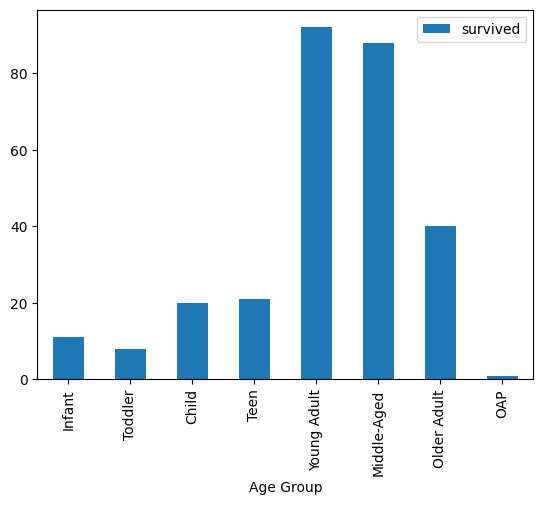

In [111]:
new_df[["survived","Age Group"]].groupby("Age Group").sum().plot.bar()